<a href="https://colab.research.google.com/github/luisdiaz1997/DataScienceCourse/blob/master/Week8_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch import optim

import tensorflow.keras as keras


In [2]:
X = torch.Tensor( [[0,0],[0, 1], [1, 0], [1, 1]])
Y = torch.Tensor([[0],[0], [0], [1]])
print(X)
print(Y)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
tensor([[0.],
        [0.],
        [0.],
        [1.]])


In [3]:
W = torch.randn(2, 1, requires_grad= True)
W

tensor([[-0.5414],
        [ 0.9005]], requires_grad=True)

In [4]:
b = torch.randn(1, 1, requires_grad= True)
b

tensor([[-0.5192]], requires_grad=True)

In [5]:
H = torch.matmul(X, W) + b
H

tensor([[-0.5192],
        [ 0.3812],
        [-1.0606],
        [-0.1602]], grad_fn=<AddBackward0>)

In [6]:
J = torch.mean((H-Y)**2)/2
J

tensor(0.3607, grad_fn=<DivBackward0>)

In [0]:
J.backward()

In [8]:
torch.matmul(X.T,(H-Y))/4

tensor([[-0.5552],
        [-0.1947]], grad_fn=<DivBackward0>)

In [9]:
W.grad

tensor([[-0.5552],
        [-0.1947]])

In [0]:
def linear(x, w, b):
  z = torch.matmul(x,w) + b
  return z

In [0]:
def start_params(features = 2, classes = 1):
  params = {'W': torch.randn(features, classes, requires_grad= True), 'b': torch.randn(1, classes, requires_grad= True)}
  return params

In [0]:
def loss_MSE(prediction, targets):
  error = prediction - targets
  return torch.mean(error **2)/2

In [0]:
def loss_EL(prediction, targets):
  M = prediction.shape[0]
  error = targets*torch.log(prediction + 1e-3) + (1-targets)*torch.log( 1 - prediction + 1e-3)

  return torch.sum(-error)/M


In [0]:
class LinearRegression():
  def __init__(self, features = 2, classes = 1):
    self.params = start_params(features = features, classes = classes)
    self.costs = []
  
  def __call__(self, inputs):
    
    return linear(inputs, self.params['W'], self.params['b'])

  def predict(self, inputs):
    inp = torch.Tensor(inputs)
    return self(inp).detach().numpy()


In [0]:
class LogisticRegression(torch.nn.Module):

  def __init__(self, features = 2, classes = 1):
    super(LogisticRegression, self).__init__()

    self.Linear = torch.nn.Linear(in_features= features, out_features= classes)
    self.costs = []
  
  def forward(self, inputs):
    Z = self.Linear(inputs)
    return torch.sigmoid(Z)

  def predict(self, inputs):
    inp = torch.Tensor(inputs)
    return self(inp).detach().numpy()

In [0]:
def fit(model, inputs, targets, loss, optimizer = None, learning_rate = 1e-3, epochs= 10):
    inp = torch.Tensor(inputs)
    out = torch.Tensor(targets)
    
    for i in tqdm(range(epochs)):
      

      J = loss(model(inp), out)
      model.costs.append(J.detach().numpy())
      J.backward()

      if optimizer is None:
        with torch.no_grad():
          for key, values in model.params.items():
            model.params[key] -= learning_rate * model.params[key].grad
            model.params[key].grad.zero_()
      else:
        optimizer.step()
        optimizer.zero_grad()

In [0]:
data_url = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv"

In [18]:
df = pd.read_csv(data_url, sep=",")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


<Figure size 432x288 with 0 Axes>

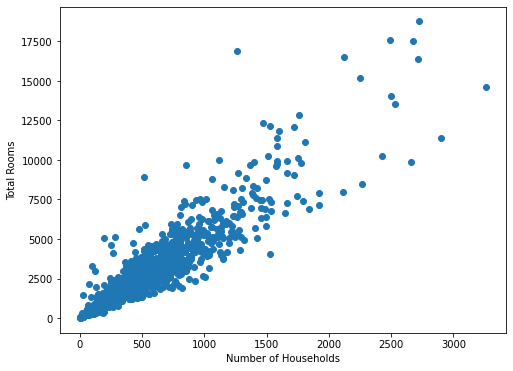

In [19]:
plt.figure(1)
x = df.households.values.reshape(-1, 1)
y = df.total_rooms.values.reshape(-1,1)
plt.figure(figsize=(8, 6))
plt.scatter(x[::10], y[::10])
plt.xlabel('Number of Households')
plt.ylabel('Total Rooms');

In [0]:
linear_model = LinearRegression(features = 1, classes = 1)

In [21]:
linear_model.params

{'W': tensor([[-0.9058]], requires_grad=True),
 'b': tensor([[0.4322]], requires_grad=True)}

In [0]:
optimizer = optim.SGD([*linear_model.params.values()], lr=1e-8, momentum= 0.9)

In [23]:
fit(linear_model, x, y, loss= loss_MSE, optimizer = optimizer, epochs = 100)

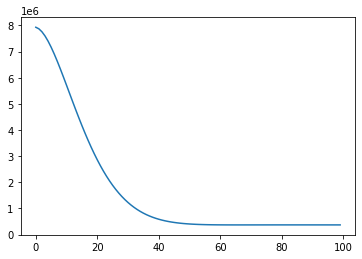

In [24]:
plt.plot(linear_model.costs)

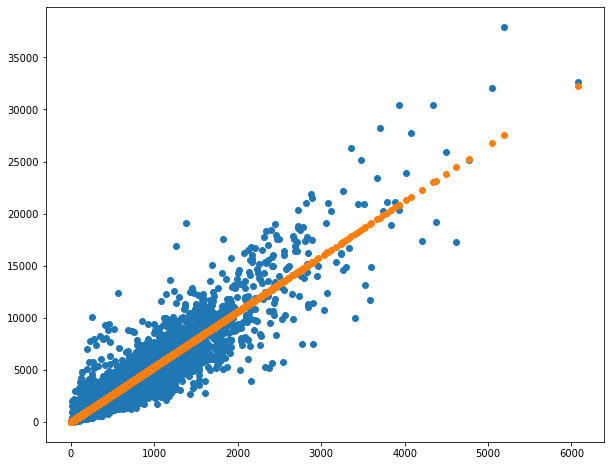

In [25]:
plt.figure(2, figsize = (10,8))

y_predict = linear_model.predict(x)
plt.scatter(x, y )
plt.scatter(x[:, 0], y_predict)


In [0]:
from sklearn.datasets import make_blobs
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers = np.array([[-3, -3], [1, 1], [5, -2]]))

In [0]:
def one_hot(data):
  new_data = np.zeros((len(data), np.max(data) + 1))
  for i, k in enumerate(data):
    new_data[i, k] = 1
  return new_data

In [28]:
y

array([1, 2, 0, ..., 2, 0, 1])

In [0]:
Y = one_hot(y)

In [30]:
Y

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

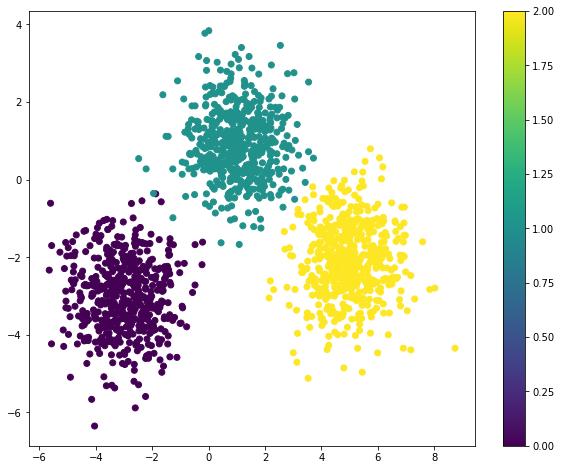

In [31]:
plt.figure(3, figsize = (10,8))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.colorbar();

In [0]:
logistic_model = LogisticRegression(features = 2, classes = 3)

In [0]:
optimizer = optim.SGD(logistic_model.parameters(), lr=0.1, momentum= 0.9)
loss = torch.nn.BCELoss()

In [34]:
fit(logistic_model, X, Y, loss= loss, optimizer = optimizer, epochs = 100)

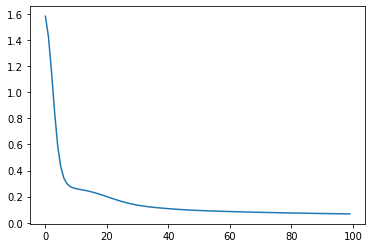

In [35]:
plt.plot(logistic_model.costs)

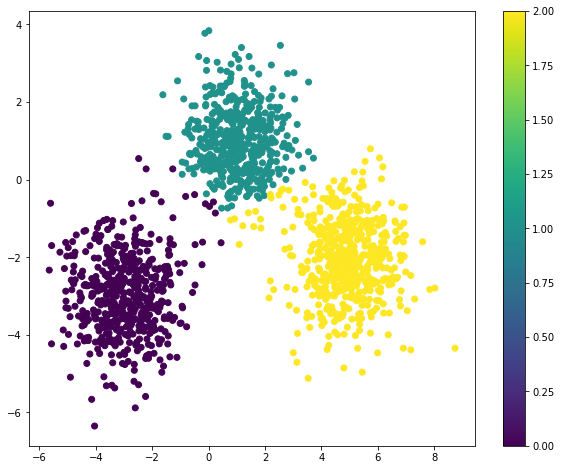

In [36]:
plt.figure(4, figsize = (10,8))

y_predict = np.argmax(logistic_model.predict(X), axis = 1)
plt.scatter(X[:, 0], X[:, 1], c = y_predict.reshape(-1))
plt.colorbar();

In [0]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255 

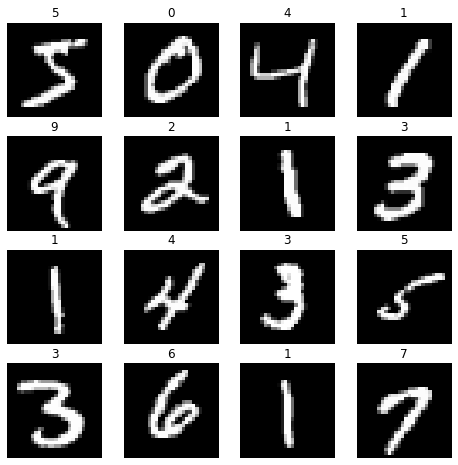

In [38]:
plt.figure(figsize= (8, 8))
k = 10
for k in range(16):
  plt.subplot(4, 4, k+1)
  plt.imshow(x_train[k], cmap = 'gray')
  plt.title(y_train[k]);
  plt.axis('off')

In [39]:
x_train.shape

(60000, 28, 28)

In [0]:
def flatten(data):
  new_data = data.reshape(data.shape[0], -1)
  return new_data

In [41]:
flatten(x_train).shape

(60000, 784)

In [0]:
mnist_model = LogisticRegression(features = flatten(x_train).shape[1], classes = 10)

In [43]:
mnist_model.Linear.weight

Parameter containing:
tensor([[-0.0198, -0.0052,  0.0142,  ..., -0.0304,  0.0216, -0.0209],
        [ 0.0207, -0.0168, -0.0266,  ...,  0.0273,  0.0174,  0.0173],
        [-0.0025,  0.0197, -0.0153,  ...,  0.0192, -0.0313, -0.0208],
        ...,
        [-0.0288, -0.0068, -0.0213,  ...,  0.0170, -0.0209, -0.0226],
        [-0.0015, -0.0180,  0.0025,  ..., -0.0323, -0.0095,  0.0232],
        [-0.0345,  0.0085,  0.0215,  ..., -0.0023, -0.0353, -0.0342]],
       requires_grad=True)

In [0]:
optimizer = optim.SGD(mnist_model.parameters(), lr=1, momentum= 0.9)

In [45]:
fit(mnist_model, flatten(x_train), one_hot(y_train), loss= torch.nn.BCELoss(), optimizer = optimizer, epochs = 50)

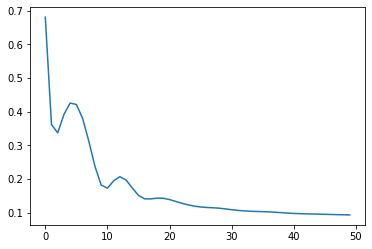

In [46]:
plt.plot(mnist_model.costs)

In [0]:
predict_y = mnist_model.predict(flatten(x_train))

In [48]:
np.mean(y_train == np.argmax(predict_y, axis  =1))

0.8761

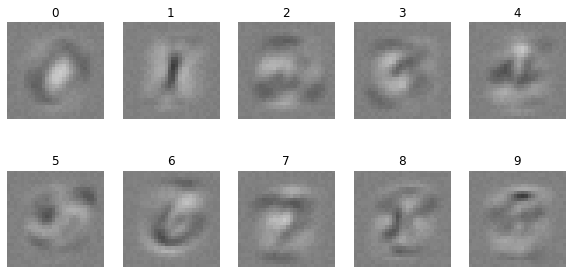

In [49]:
plt.figure(figsize= (10, 5))
weights = mnist_model.Linear.weight.T.detach().numpy()
for k in range(10):
  plt.subplot(2, 5, k+1)
  plt.imshow(weights[:, k].reshape(28, 28), vmin = -1, vmax =1, cmap = 'gray_r')
  plt.title(k)
  plt.axis('off');

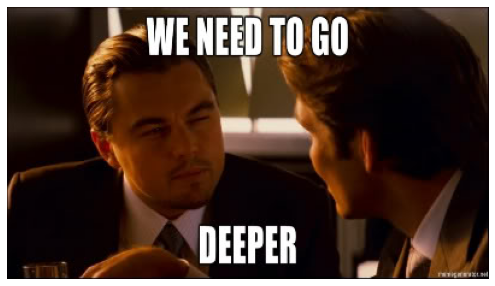

In [50]:
from skimage import io
image = io.imread('https://i.kym-cdn.com/photos/images/original/000/531/557/a88.jpg')
plt.figure(figsize = (10, 5))
plt.imshow(image)
plt.axis('off');

In [0]:
def fit(model, inputs, targets, loss, optimizer = None, learning_rate = 1e-3, epochs= 10):
    inp = torch.Tensor(inputs).cuda()
    out = torch.Tensor(targets).cuda()
    
    for i in tqdm(range(epochs)):
      

      J = loss(model(inp), out)
      model.costs.append(J.cpu().detach().numpy())
      J.backward()

      if optimizer is None:
        with torch.no_grad():
          for key, values in model.params.items():
            model.params[key] -= learning_rate * model.params[key].grad
            model.params[key].grad.zero_()
      else:
        optimizer.step()
        optimizer.zero_grad()

In [0]:
class NeuralNet(torch.nn.Module):

  def __init__(self, features = 2, h1 = 64 ,classes = 1):
    super(NeuralNet, self).__init__()

    self.flatten = torch.nn.Flatten()
    self.Linear1 = torch.nn.Linear(in_features= features, out_features= h1)
    self.Linear2 = torch.nn.Linear(in_features= h1, out_features= classes)
    self.costs = []
  
  def forward(self, inputs):

    x= self.flatten(inputs)
    x = self.Linear1(x)
    x = torch.relu(x)

    x= self.Linear2(x)

    x = torch.sigmoid(x)


    return x

  def predict(self, inputs):
    inp = torch.Tensor(inputs).cuda()
    return self(inp).cpu().detach().numpy()

In [0]:
Net = NeuralNet(features = 784, h1= 64, classes = 10)

In [54]:
Net.cuda()

NeuralNet(
  (flatten): Flatten()
  (Linear1): Linear(in_features=784, out_features=64, bias=True)
  (Linear2): Linear(in_features=64, out_features=10, bias=True)
)

In [55]:
from torchsummary import summary

summary(Net, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                   [-1, 64]          50,240
            Linear-3                   [-1, 10]             650
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.19
Estimated Total Size (MB): 0.20
----------------------------------------------------------------


In [0]:
optimizer = optim.SGD(Net.parameters(), lr=1, momentum= 0.9)

In [57]:
fit(Net, x_train, one_hot(y_train), loss= torch.nn.BCELoss(), optimizer = optimizer, epochs = 1000)

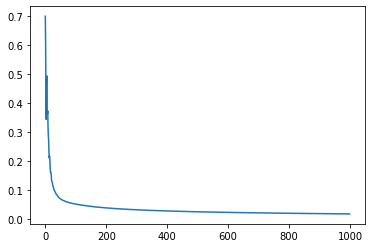

In [58]:
plt.plot(Net.costs)

In [0]:
y_train_predict = Net.predict(x_train)

In [60]:
np.mean(y_train == np.argmax(y_train_predict, axis = 1))

0.9779833333333333

In [0]:
y_test_predict = Net.predict(x_test)

In [62]:
np.mean(y_test == np.argmax(y_test_predict, axis = 1))

0.9688

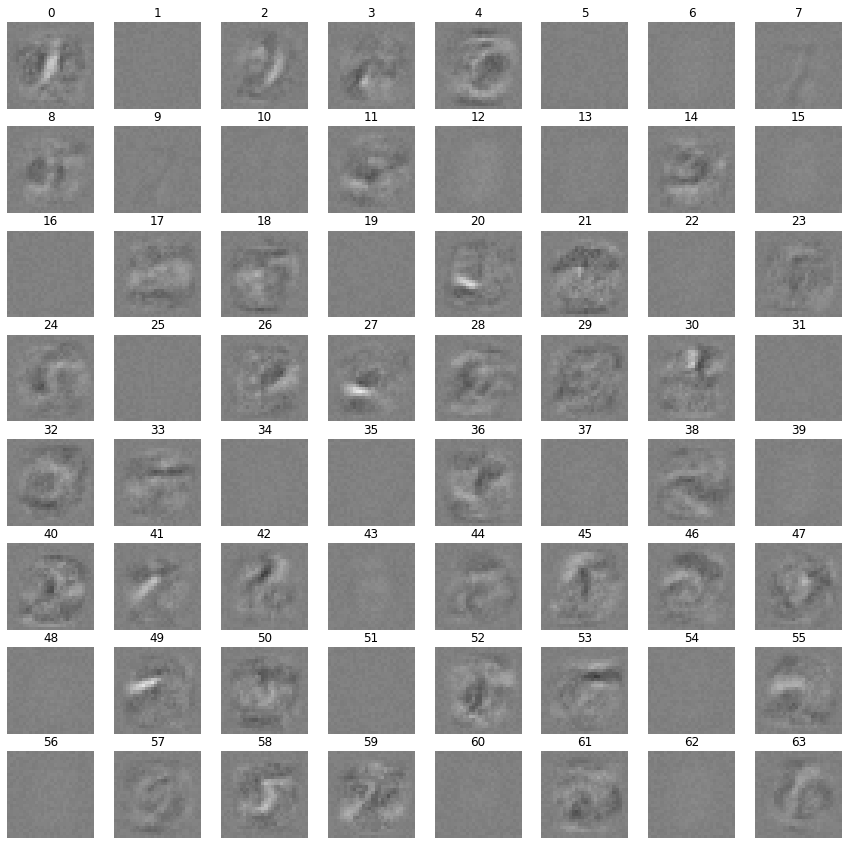

In [63]:
plt.figure(figsize= (15, 15))
weights = Net.Linear1.weight.T.cpu().detach().numpy()
for k in range(64):
  plt.subplot(8, 8, k+1)
  plt.imshow(weights[:, k].reshape(28, 28), vmin = -1, vmax =1, cmap = 'gray_r')
  plt.title(k)
  plt.axis('off');

In [0]:
class KNeuralNet(keras.Model):

  def __init__(self):
    super(KNeuralNet, self).__init__()

    self.flatten = keras.layers.Flatten()
    self.Dense1 = keras.layers.Dense(64, activation= 'relu')
    self.Dense2 = keras.layers.Dense(10, activation= 'softmax')
  
  def call(self, inputs):

    x = self.flatten(inputs)
    x = self.Dense1(x)
    x = self.Dense2(x)

    return x

In [0]:
model = KNeuralNet()

In [66]:
model(keras.layers.Input(( 28, 28, 1)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


<tf.Tensor 'k_neural_net/dense_1/Softmax:0' shape=(?, 10) dtype=float32>

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

In [68]:
model.summary()

Model: "k_neural_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [69]:
history= model.fit(x = x_train, y = y_train, batch_size= 1000, epochs= 10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 0s 7us/sample - loss: 0.9925 - sparse_categorical_accuracy: 0.7371 - val_loss: 0.4290 - val_sparse_categorical_accuracy: 0.8917
Epoch 2/10
60000/60000 [==============================] - 0s 6us/sample - loss: 0.3749 - sparse_categorical_accuracy: 0.8984 - val_loss: 0.3151 - val_sparse_categorical_accuracy: 0.9159
Epoch 3/10
60000/60000 [==============================] - 0s 6us/sample - loss: 0.2999 - sparse_categorical_accuracy: 0.9167 - val_loss: 0.2712 - val_sparse_categorical_accuracy: 0.9267
Epoch 4/10
60000/60000 [==============================] - 0s 6us/sample - loss: 0.2606 - sparse_categorical_accuracy: 0.9277 - val_loss: 0.2414 - val_sparse_categorical_accuracy: 0.9340
Epoch 5/10
60000/60000 [==============================] - 0s 6us/sample - loss: 0.2319 - sparse_categorical_accuracy: 0.9359 - val_loss: 0.2199 - val_sparse_categorical_accuracy: 0.9393
Epoch 6/10
60000/600

In [70]:
history.history

{'loss': [0.992469584941864,
  0.3749490574002266,
  0.29993320604165397,
  0.26064356192946436,
  0.231921998411417,
  0.20922472154100735,
  0.1904329905907313,
  0.1758831185599168,
  0.16300660595297814,
  0.15172277688980101],
 'sparse_categorical_accuracy': [0.7371,
  0.8983833,
  0.9167333,
  0.9277,
  0.93585,
  0.94285,
  0.94715,
  0.95108336,
  0.9548,
  0.9580167],
 'val_loss': [0.4289576321840286,
  0.3150965064764023,
  0.27118625640869143,
  0.24143022298812866,
  0.21986908167600633,
  0.20096841901540757,
  0.18588704764842987,
  0.17519669085741044,
  0.16351716518402098,
  0.15532374158501625],
 'val_sparse_categorical_accuracy': [0.8917,
  0.9159,
  0.9267,
  0.934,
  0.9393,
  0.9456,
  0.9475,
  0.9504,
  0.9541,
  0.9555]}

10000/10000 - 0s - loss: 0.1553 - sparse_categorical_accuracy: 0.9555


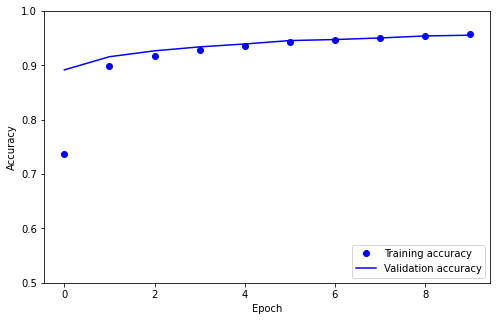

In [71]:
plt.figure(figsize = (8, 5))
plt.plot(history.history['sparse_categorical_accuracy'], 'bo', label='Training accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], 'b', label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)